# Ames Housing ML Challenge


Laura Elliott
group SurrealEstates


In [10]:
###### Importing data and loading packages

import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1. EDA

In [2]:
### Checking Dimensions of datasets

print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


### Looking at the column values in the train dataset

In [ ]:
train.columns.values


## Exploring Relationships

### Correlation heatmap for all Continuous variables

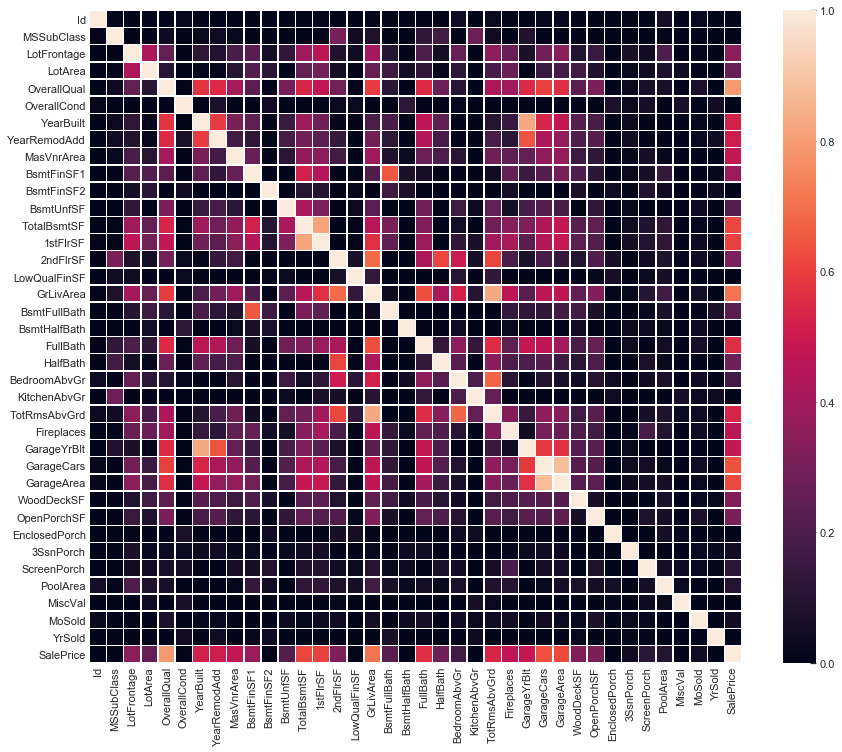

In [30]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

###  Top 10 Correlations

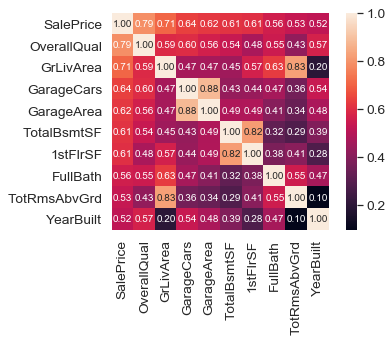

In [31]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# Linearity and Remove Outliers

#### 1stFlrSF vs. Sale Price

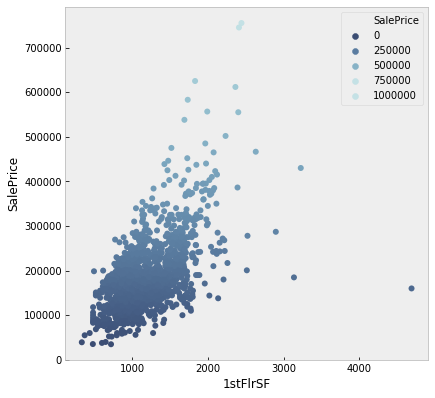

In [3]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="1stFlrSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [4]:
threshold = 2000

train = train[train.loc[:,'1stFlrSF'] < threshold]


In [5]:
train.shape

(1418, 81)

##### GrLivArea vs. Sale Price

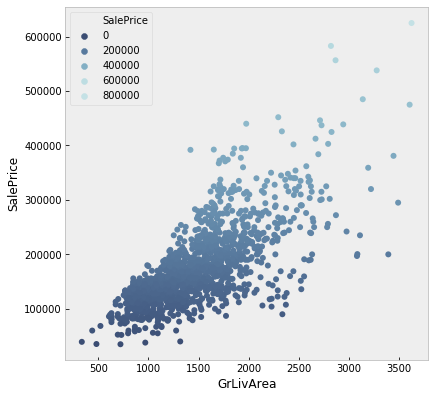

In [6]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GrLivArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [7]:
threshold = 2500

train = train[train.loc[:,'GrLivArea'] < threshold]




In [8]:
train.shape

(1361, 81)

##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

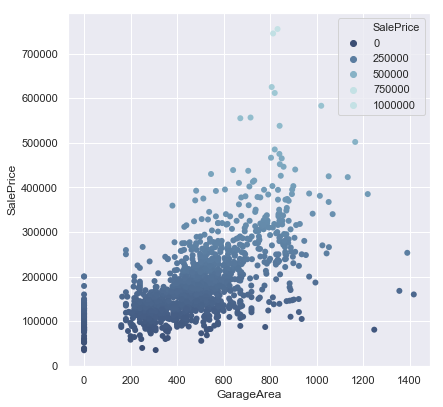

In [22]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 1000

train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

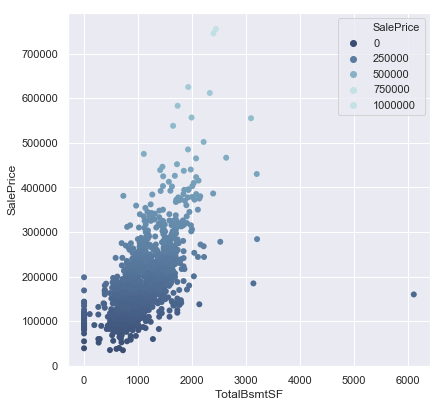

In [23]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 2000

train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

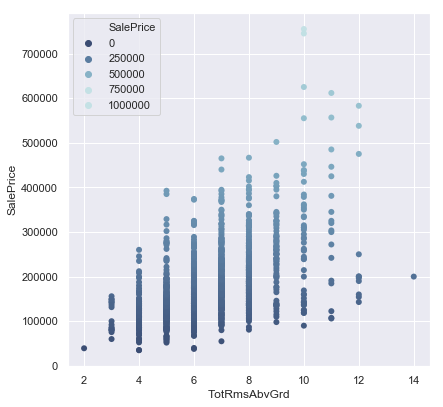

In [25]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotRmsAbvGrd", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [ ]:
threshold = 14

train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

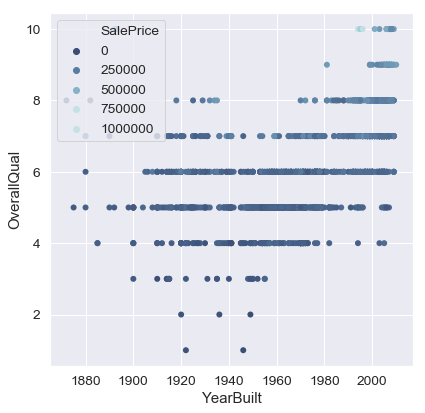

In [36]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="YearBuilt", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

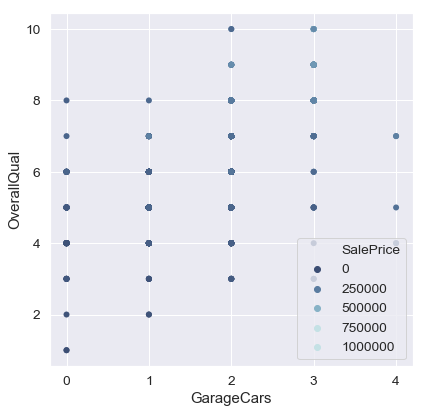

In [37]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

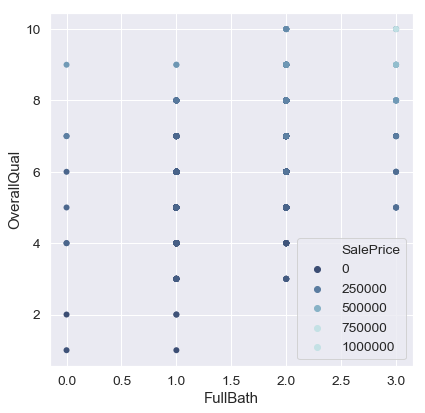

In [38]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="FullBath", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

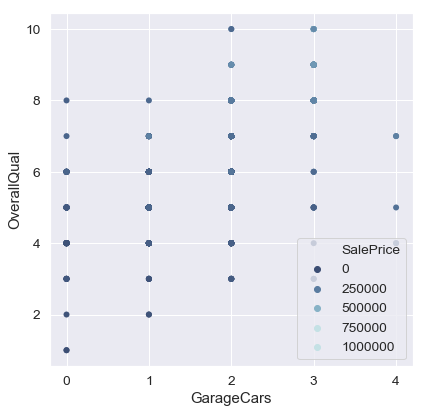

In [39]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

## 2. Missing Variables

In [11]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.merge(train, test, how='outer').reset_index(drop=True)

y_sale = pd.DataFrame(train['SalePrice'])
id_temp = pd.DataFrame(housing_merge['Id'])


housing_merge.drop(['Id'], axis=1, inplace=True)
housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
#print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1460, 81)
Test data size is : (1459, 80)


In [ ]:
train.head()

In [12]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
PoolQC,0.996574,2909
MiscFeature,0.964029,2814
Alley,0.932169,2721
Fence,0.804385,2348
FireplaceQu,0.486468,1420
LotFrontage,0.166495,486
GarageYrBlt,0.054471,159
GarageFinish,0.054471,159
GarageQual,0.054471,159
GarageCond,0.054471,159


In [13]:
housing_merge.drop(['PoolQC', 'FireplaceQu'], axis=1, inplace=True)

In [14]:
housing_merge['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

#### Converting categorical variables in the merged dataset

In [15]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [16]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', train['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [17]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [18]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [19]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [20]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [21]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [22]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [23]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing random 

In [25]:
# LotFrontage
housing_merge['LotFrontage'] = housing_merge['LotFrontage'].apply(lambda x: np.random.choice(housing_merge['LotFrontage'].dropna().values) if np.isnan(x) else x)
#.fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


LotFrontage missing: 0


In [26]:
# MasVnrArea

housing_merge['MasVnrArea'] = housing_merge['MasVnrArea'].apply(lambda x: np.random.choice(housing_merge['MasVnrArea'].dropna().values) if np.isnan(x) else x)
#housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


MasVnrArea missing: 0


In [27]:
# BsmtFinSF1
#housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)

housing_merge['BsmtFinSF1'] = housing_merge['BsmtFinSF1'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF1'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


BsmtFinSF1 missing: 0


In [28]:
# BsmtFinSF2
#housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
housing_merge['BsmtFinSF2'] = housing_merge['BsmtFinSF2'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF2'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


BsmtFinSF2 missing: 0


In [29]:
# BsmtUnfSF
#housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
housing_merge['BsmtUnfSF'] = housing_merge['BsmtUnfSF'].apply(lambda x: np.random.choice(housing_merge['BsmtUnfSF'].dropna().values) if np.isnan(x) else x)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


BsmtunfSF missing: 0


In [30]:
# TotalBasmtSF
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)

housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



TotalBsmtSF missing: 0


In [31]:
# GarageArea
#housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)

housing_merge['GarageArea'] = housing_merge['GarageArea'].apply(lambda x: np.random.choice(housing_merge['GarageArea'].dropna().values) if np.isnan(x) else x)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



GarageArea missing: 0


In [32]:
# Total Bsmt Sf
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




TotalBsmtSF missing: 0


#### Imputing median 

In [33]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [34]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



BsmtFullBath missing: 0


In [35]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [36]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [37]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [38]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [39]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [40]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [41]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [42]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [43]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [44]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [45]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [46]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


In [47]:
housing_merge.LotArea.isna().sum()

0

#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [48]:
impute_none = housing_merge.loc[:, [ 'MiscFeature', 'Alley', 'Fence',
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [49]:
#Check
missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [50]:
housing_merge.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [51]:
housing_merge.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [52]:
housing_merge.shape

(2919, 77)

### Creating New Features

In [53]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [54]:

housing_merge['TotalBathrooms'] = (housing_merge['FullBath'] + (0.5*housing_merge['HalfBath']) +
                              housing_merge['BsmtFullBath'] + (0.5*housing_merge['BsmtHalfBath']))



In [55]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [ ]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
housing_merge.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0


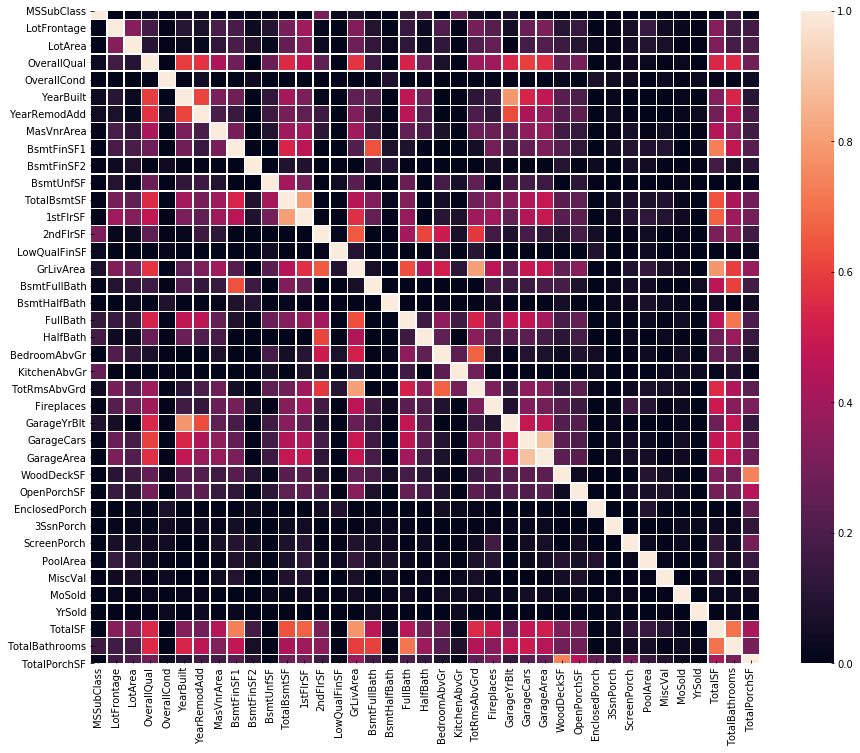

In [57]:
corr = housing_merge.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

In [58]:
housing_merge.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [59]:
housing_merge.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF'], axis=1, inplace=True)

In [60]:
housing_merge.drop(['3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

In [61]:
housing_merge.drop(['GarageCars'], axis=1, inplace=True)

In [62]:
housing_merge.drop(['LotFrontage'], axis=1, inplace=True)

In [63]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [64]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [65]:
housing_merge.shape

(2919, 66)

In [66]:
housing_merge.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

### Dummification

In [70]:
categori_cols

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

#### Using Label Encoder to encode Categorical Values

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'BldgType', 'BsmtCond', 'BsmtExposure','Fence', 'MiscFeature', 'Alley',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [72]:
#np.where(np.isnan(housing_merge))

In [73]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2919, 71)


In [74]:
### hanging back to category

housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']] = housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd',  'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']].astype('category')


In [75]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

# 5.0 Checking Assumptions: Normality

In [76]:
#### Continuous Vars

In [77]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,MoSold,YrSold,TotalSF,TotalBathrooms,TotalPorchSF,Pool,Has2flor,hasGarage,hasBsmt,hasFireplace
0,60,8450,7,5,2003,2003,196.0,150.0,856.0,854,...,2,2008,2416.0,3.5,61,0,1,1,1,0
1,20,9600,6,8,1976,1976,0.0,284.0,1262.0,0,...,5,2007,2240.0,2.5,298,0,0,1,1,1
2,60,11250,7,5,2001,2002,162.0,434.0,920.0,866,...,9,2008,2272.0,3.5,42,0,1,1,1,1
3,70,9550,7,5,1915,1970,0.0,540.0,756.0,756,...,2,2006,1933.0,2.0,307,0,1,1,1,1
4,60,14260,8,5,2000,2000,350.0,490.0,1145.0,1053,...,12,2008,2853.0,3.5,276,0,1,1,1,1


array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF',
       'TotalBathrooms', 'TotalPorchSF', 'Pool', 'Has2flor', 'hasGarage',
       'hasBsmt', 'hasFireplace'], dtype=object)

In [78]:
train_num_std = [col for col in num_housing_merge if abs(housing_merge[col].skew()) <= 1]
train_num_yjt = [col for col in num_housing_merge if abs(housing_merge[col].skew()) > 1]

In [79]:
########### Transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

### Num
scaler = StandardScaler().fit(housing_merge[train_num_std].values)
housing_merge[train_num_std] = scaler.transform(housing_merge[train_num_std].values)

### power transform
pt = PowerTransformer().fit(housing_merge[train_num_yjt].values)
housing_merge[train_num_yjt] = pt.transform(housing_merge[train_num_yjt].values)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [80]:
##### Sale Price

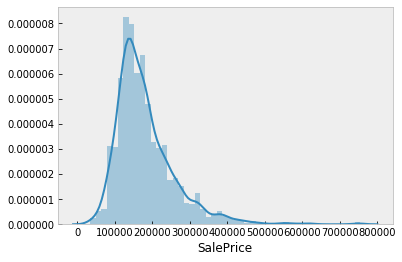

In [81]:
sns.distplot(y_sale['SalePrice'])

In [82]:
y_sale = np.log1p(y_sale)

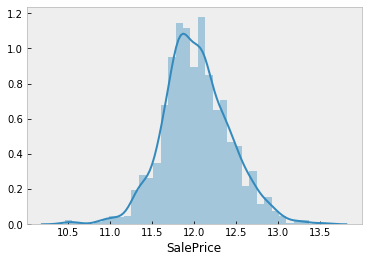

In [83]:
sns.distplot(y_sale['SalePrice'])


In [87]:
housing_merge = pd.concat([housing_merge, id_temp], axis=1)

In [88]:
print(housing_merge.shape)

(2919, 246)


In [89]:
print(y_sale.shape)

(1460, 1)


### To CSV


In [90]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1353, :])
housing_test = pd.DataFrame(housing_merge.iloc[1353:,:])

y_train = pd.DataFrame( y_sale)

In [91]:
housing_train.shape

(1353, 246)

In [ ]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)